In [46]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\Gradient boosting task\CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [47]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(763)

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df["car_age"] = 2020 - df["year"]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


In [52]:
df["brand"] = df["name"].str.split(" ").str[0]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4,Hyundai


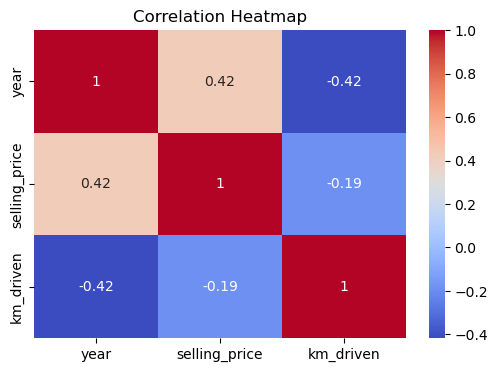

In [64]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["year", "selling_price", "km_driven"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
df1 = df.copy()

categorical_cols = ["fuel", "seller_type", "transmission", "owner", "brand"]
for col in categorical_cols:
    df1[col] = df1[col].astype("category").cat.codes
df1 = df1.drop(columns=["name"])
print(df1.to_string())

      year  selling_price  km_driven  fuel  seller_type  transmission  owner  car_age  brand
0     2007          60000      70000     4            1             1      0       13     18
1     2007         135000      50000     4            1             1      0       13     18
2     2012         600000     100000     1            1             1      0        8     10
3     2017         250000      46000     4            1             1      0        3      5
4     2014         450000     141000     1            1             1      2        6      9
5     2007         140000     125000     4            1             1      0       13     18
6     2016         550000      25000     4            1             1      0        4     10
7     2014         240000      60000     4            1             1      2        6     25
8     2015         850000      25000     4            1             1      0        5     10
9     2017         365000      78000     0            1             1 

<Axes: >

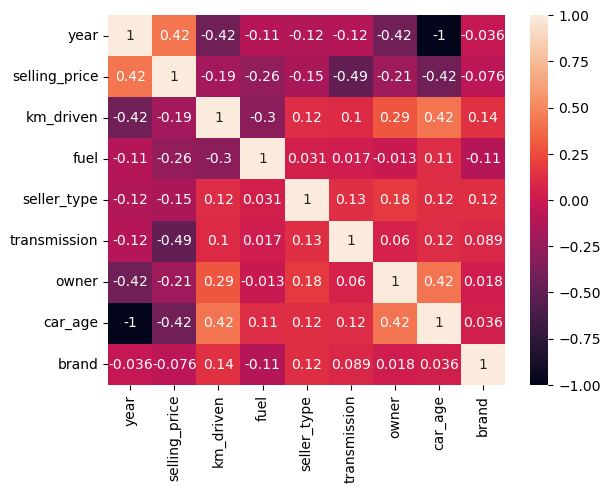

In [66]:
sns.heatmap(df1.corr(),annot=True)

<Axes: xlabel='selling_price', ylabel='Count'>

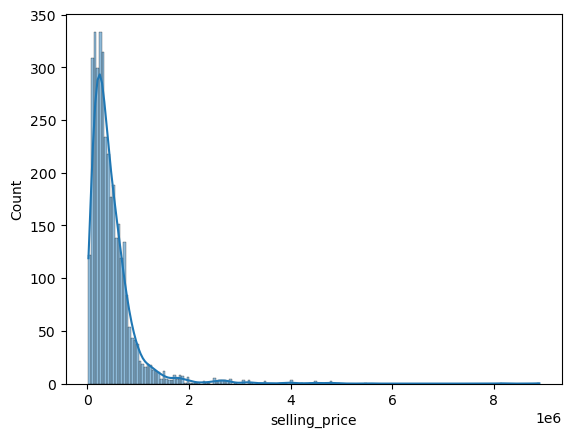

In [61]:
sns.histplot(df['selling_price'],kde=True)

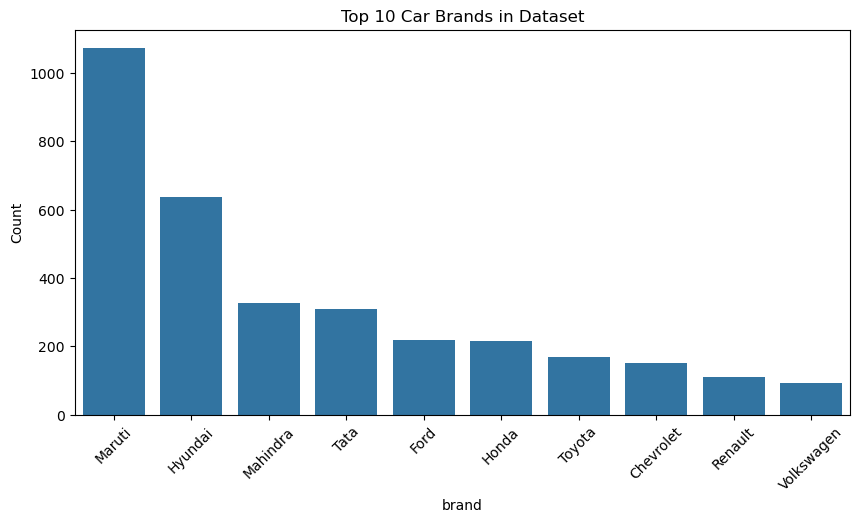

In [57]:
top_brands = df["brand"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Car Brands in Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

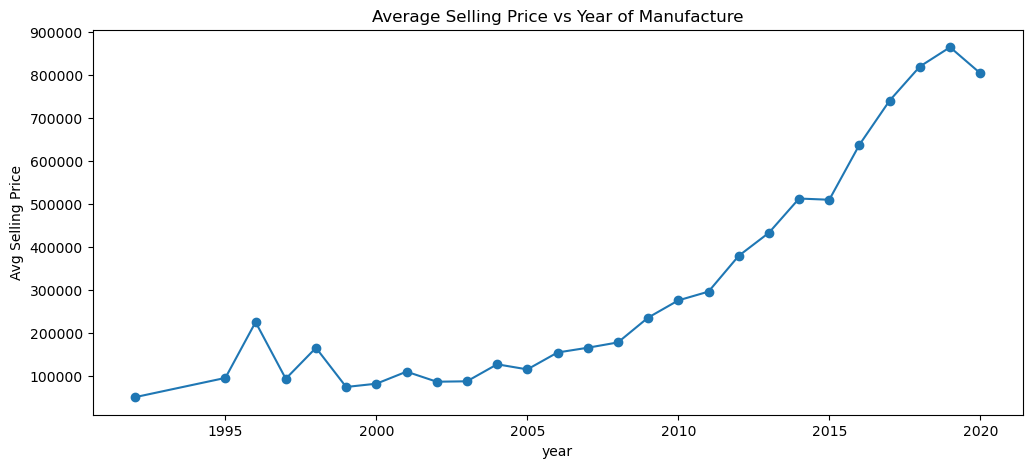

In [58]:
plt.figure(figsize=(12,5))
df.groupby("year")["selling_price"].mean().plot(kind="line", marker="o")
plt.title("Average Selling Price vs Year of Manufacture")
plt.ylabel("Avg Selling Price")
plt.show()